<a href="https://colab.research.google.com/github/AnshRoshan/python-projects/blob/main/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [3]:
train_data=datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data=datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37720557.14it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1107840.34it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9659457.43it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3676288.84it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [17]:
print(test_data)
# print(test_data.data)
# print(test_data.data[0])
print(test_data.data.shape)
print(test_data.data.size())
print(test_data.targets[0])
print(test_data.targets.shape)
print(test_data.targets.size())

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([10000, 28, 28])
torch.Size([10000, 28, 28])
tensor(7)
torch.Size([10000])
torch.Size([10000])


In [32]:
from torch.utils.data import DataLoader

loaders={
'train':DataLoader(train_data,batch_size=100,shuffle=True,num_workers=2),
'test':DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1)
}
print(loaders)
print(loaders['test'])
print(loaders['test'].dataset)
print(len(loaders['test']))
print(len(loaders['test'].dataset))

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f538e8ef1f0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f538e8ed2a0>}
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
100
10000


In [36]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,10,5)
    self.conv2 = nn.Conv2d(10,20,5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320,50)
    self.fc2 = nn.Linear(50,10)

  def forward(self,x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1,320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x,training=self.training)
    x = self.fc2(x)
    return F.log_softmax(x,dim=1)

In [37]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = CNN().to(device)
print(model)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
#  loss function
criterion = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)}\
       ({100. * batch_idx / len(loaders['train']):.0f}%)]\tLoss: {loss.item():.6f}")

def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += criterion(output, target).item()
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(loaders['test'].dataset)
  print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders['test'].dataset)}\
  ({100. * correct / len(loaders['test'].dataset):.0f}%)\n")
  return 100. * correct / len(loaders['test'].dataset)


cpu
CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


7


<function matplotlib.pyplot.show(close=None, block=None)>

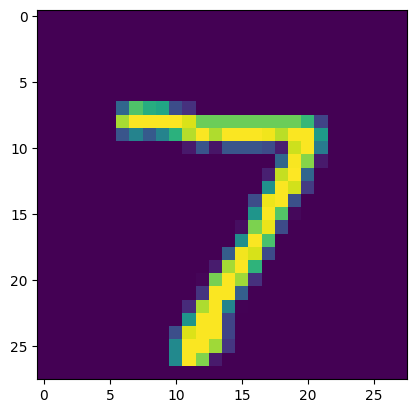

In [47]:
import matplotlib.pyplot as plt

model.eval()
data, target = test_data[0]
data=data.unsqueeze(0).to(device)
output= model(data)
# plt.imshow(data[0].cpu().detach().numpy())
# plt.show
prediction= output.argmax(dim=1,keepdim=True).item()
print(prediction)
image=data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, )
plt.show